# 1: Overall Review

### The historical trends in Canada-China import and export trade in 2014-2023

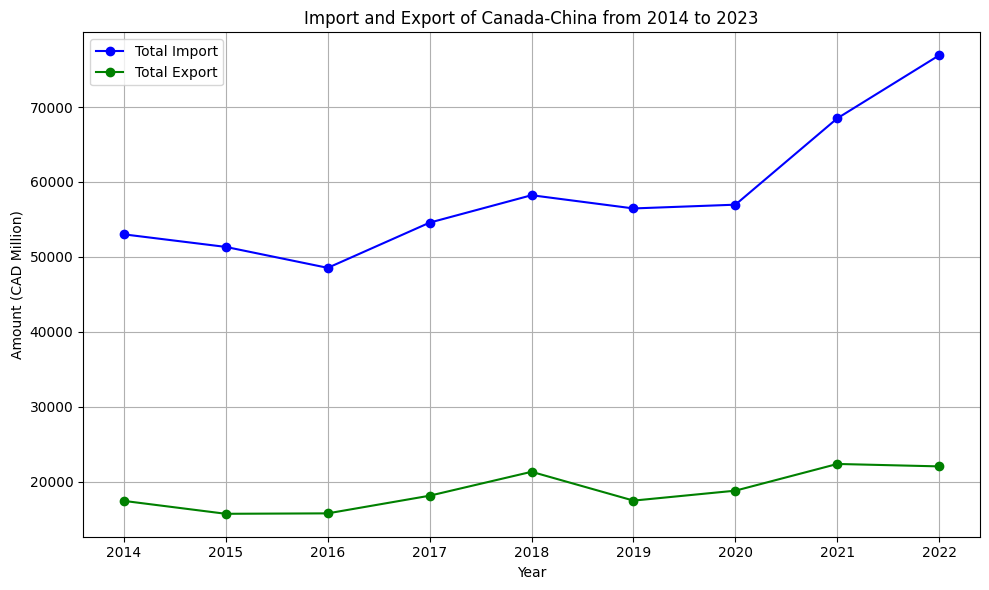

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'import_export_dataset.csv'
df_import_export = pd.read_csv(file_path)

import_data = df_import_export.iloc[0, 1:10]
export_data = df_import_export.iloc[3, 1:10]

years = df_import_export.columns[1:10]

import_values = pd.to_numeric(import_data, errors='coerce')
export_values = pd.to_numeric(export_data, errors='coerce')

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(years, import_values, label='Total Import', marker='o', color='blue')
ax.plot(years, export_values, label='Total Export', marker='o', color='green')

ax.set_xlabel('Year')
ax.set_ylabel('Amount (CAD Million)')
ax.set_title('Import and Export of Canada-China from 2014 to 2023')
ax.grid(True)
ax.legend()

plt.tight_layout()

plt.show()

### The relationship between Canada’s GDP in 2014-2023

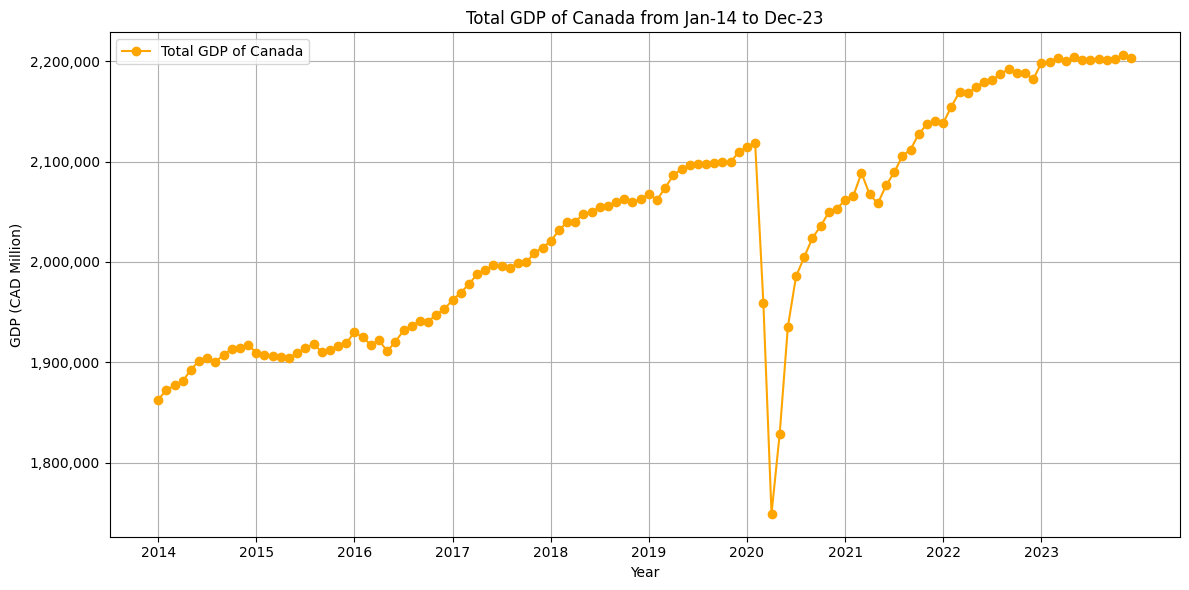

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

file_path = 'dataset-GDP.csv'
df_new = pd.read_csv(file_path)

gdp_data = df_new.iloc[0, 1:]

dates = df_new.columns[1:]

gdp_values = pd.to_numeric(gdp_data.str.replace(',', '').str.strip(), errors='coerce')

years = [date[-2:] for date in dates]
year_ticks = [f"20{year}" for year in sorted(set(years))]

plt.figure(figsize=(12, 6))
plt.plot(dates, gdp_values, label='Total GDP of Canada', marker='o', color='orange')
plt.xticks(ticks=[i for i in range(0, len(dates), 12)], labels=year_ticks)
plt.xlabel('Year')
plt.ylabel('GDP (CAD Million)')
plt.title('Total GDP of Canada from Jan-14 to Dec-23')
plt.grid(True)

plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.legend()
plt.show()


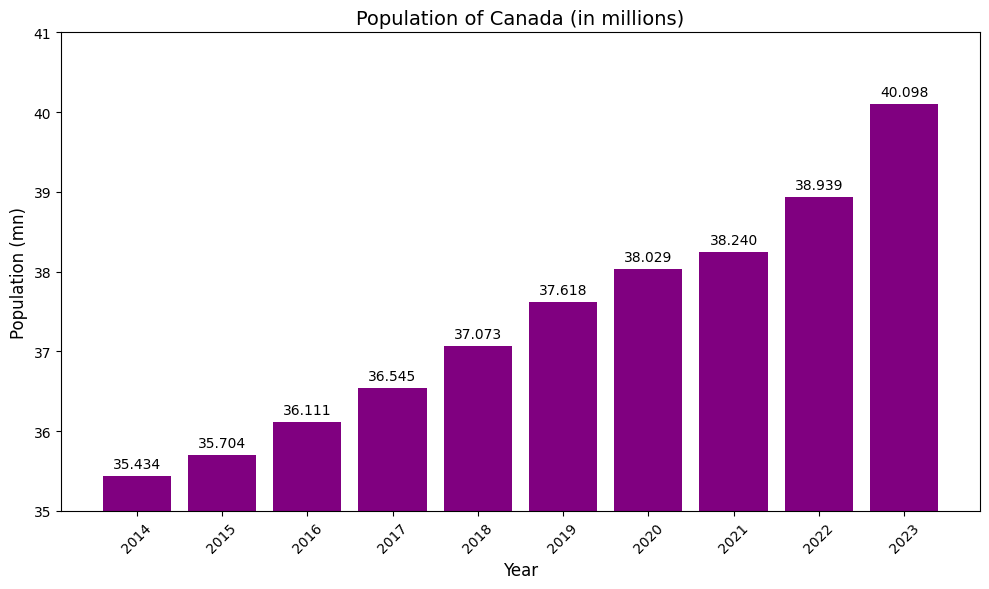

In [ ]:
# The population of Canada in 2014-2023

import pandas as pd
import matplotlib.pyplot as plt

file_path = 'population.csv'
population_data = pd.read_csv(file_path)

plt.figure(figsize=(10,6))

plt.bar(population_data['Year'], population_data['Population (mn)'], color='purple')

for index, value in enumerate(population_data['Population (mn)']):
    plt.text(population_data['Year'][index], value + 0.1, f'{value:.3f}', ha='center')

plt.title('Population of Canada (in millions)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population (mn)', fontsize=12)

plt.ylim(35, 41)

plt.xticks(population_data['Year'], rotation=45)
plt.tight_layout()

plt.show()

# 5: potential future trends for China-Canada import and export trade

### Donut charts for Canada-China import proportions and Canada-China export proportions in 2023

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data
import_summary_path = '/content/Lynch/Canada_Import_Summary.csv'
export_summary_path = '/content/Lynch/Canada_Export_Summary.csv'

import_summary_df = pd.read_csv(import_summary_path)
export_summary_df = pd.read_csv(export_summary_path)

# Check about the data
print(import_summary_df.head())
print(export_summary_df.head())


                                     Commodities  Comodity code         2014  \
0     Agriculture, Forestry, Fishing and Hunting             11    699301397   
1  Mining, Quarrying, and Oil and Gas Extraction             21    111534975   
2                                   Construction             23    167363166   
3                                  Manufacturing             31  26540866868   
4                                   Retail Trade             44  11022352646   

          2015         2016         2017         2018         2019  \
0    667436011    722433707    751558395    738508300    777377642   
1     50703707    147435701     38482950     50471161     90939217   
2    173779900    190026051    216547894    235466187    224059010   
3  24916731609  23905924835  27058499337  29222386741  28445204149   
4  10861769655   9966954041  10537016911  10737020941  10339217383   

          2020         2021         2022         2023  
0    732911520    784875438    932818704  

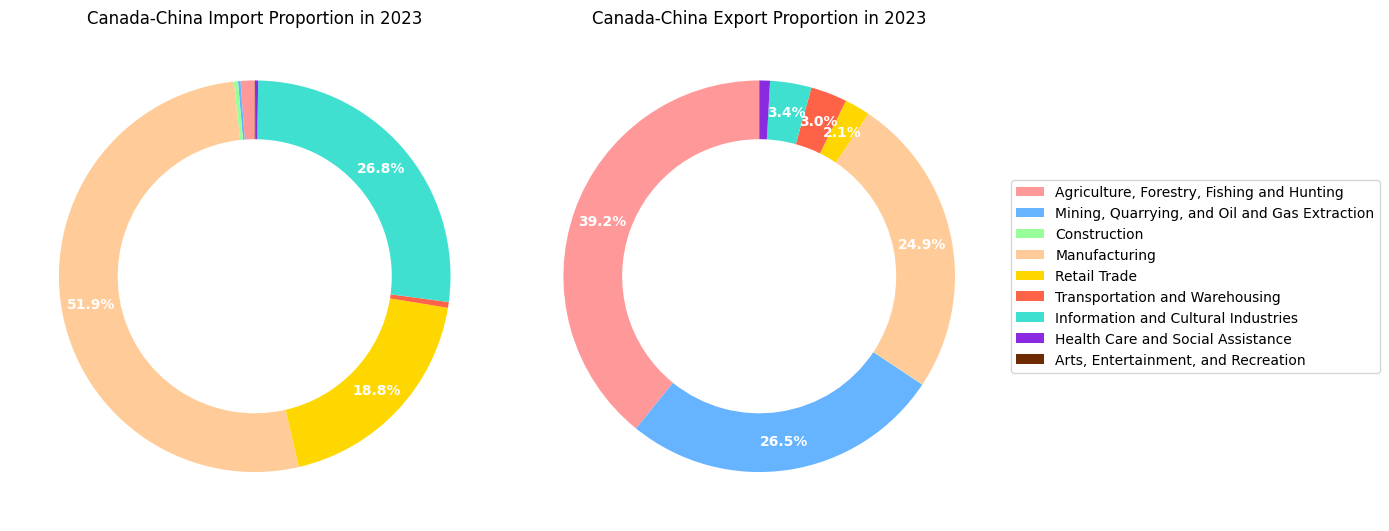

In [ ]:


# Create a plot and adjust size
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot for import
import_summary_total = import_summary_df[['Commodities', '2023']].copy()
import_summary_total['2023'] = import_summary_total['2023'].astype(float)

# Adjust color for both plots
colors_import = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700', '#FF6347', '#40E0D0', '#8A2BE2', '#6E2A02']
colors_export = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700', '#FF6347', '#40E0D0', '#8A2BE2', '#6E2A02']

# 画进口饼图，设置小于2%的百分比不显示 Plot for export, hide the proportion label for sector less than 2%
wedges1, texts1, autotexts1 = axes[0].pie(import_summary_total['2023'],
                                          colors=colors_import,
                                          autopct=lambda pct: ('%.1f%%' % pct) if pct > 2 else '',
                                          startangle=90,
                                          pctdistance=0.85,
                                          wedgeprops=dict(width=0.3))

axes[0].set_title('Canada-China Import Proportion in 2023')

# 出口数据饼图
export_summary_total = export_summary_df[['Commodities', '2023']].copy()
export_summary_total['2023'] = export_summary_total['2023'].astype(float)

# 画出口饼图，设置小于2%的百分比不显示
wedges2, texts2, autotexts2 = axes[1].pie(export_summary_total['2023'],
                                          colors=colors_export,
                                          autopct=lambda pct: ('%.1f%%' % pct) if pct > 2 else '',
                                          startangle=90,
                                          pctdistance=0.85,
                                          wedgeprops=dict(width=0.3))

axes[1].set_title('Canada-China Export Proportion in 2023')

# 将import或export的商品类别作为唯一图例
labels = list(import_summary_total['Commodities'])  # 你可以使用 import_summary_total 或 export_summary_total，因为两者相同

# 只用一个图例
plt.legend(wedges1, labels, loc="center left", bbox_to_anchor=(1, 0.5))

# 调整标签文本颜色
for autotext in autotexts1 + autotexts2:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

# 确保布局紧凑
plt.tight_layout()

# 显示图形
plt.show()


P2 去年进出口前十增长率


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
export_data = pd.read_csv('/content/Lynch/Canada_Export.csv')

# 提取商品名称和年份列
years = [str(year) for year in range(2014, 2024)]
export_data['CAGR'] = (export_data[years[-1]] / export_data[years[0]]) ** (1 / (len(years) - 1)) - 1

# 按年增长率排序，找出增长最快的类别
top_categories = export_data[['Commodities', 'CAGR']].sort_values(by='CAGR', ascending=False).head(10)

# 打印结果
print(top_categories)


                                        Commodities      CAGR
44                                              tin  0.707711
10      residues-wastes-food-industry-animal-fodder  0.643764
58  articles-apparel-accessories-not-knit-crocheted  0.582490
72                            footwear-gaiters-like  0.421225
79                           coffee-tea-mate-spices  0.402900
19      articles-apparel-accessories-knit-crocheted  0.373560
35       umbrellas-walking-sticks-seat-sticks-whips  0.338672
4                           pharmaceutical-products  0.333894
25   cereal-flour-starch-milk-preparations-products  0.308883
34              pearls-precious-stones-metals-coins  0.295778


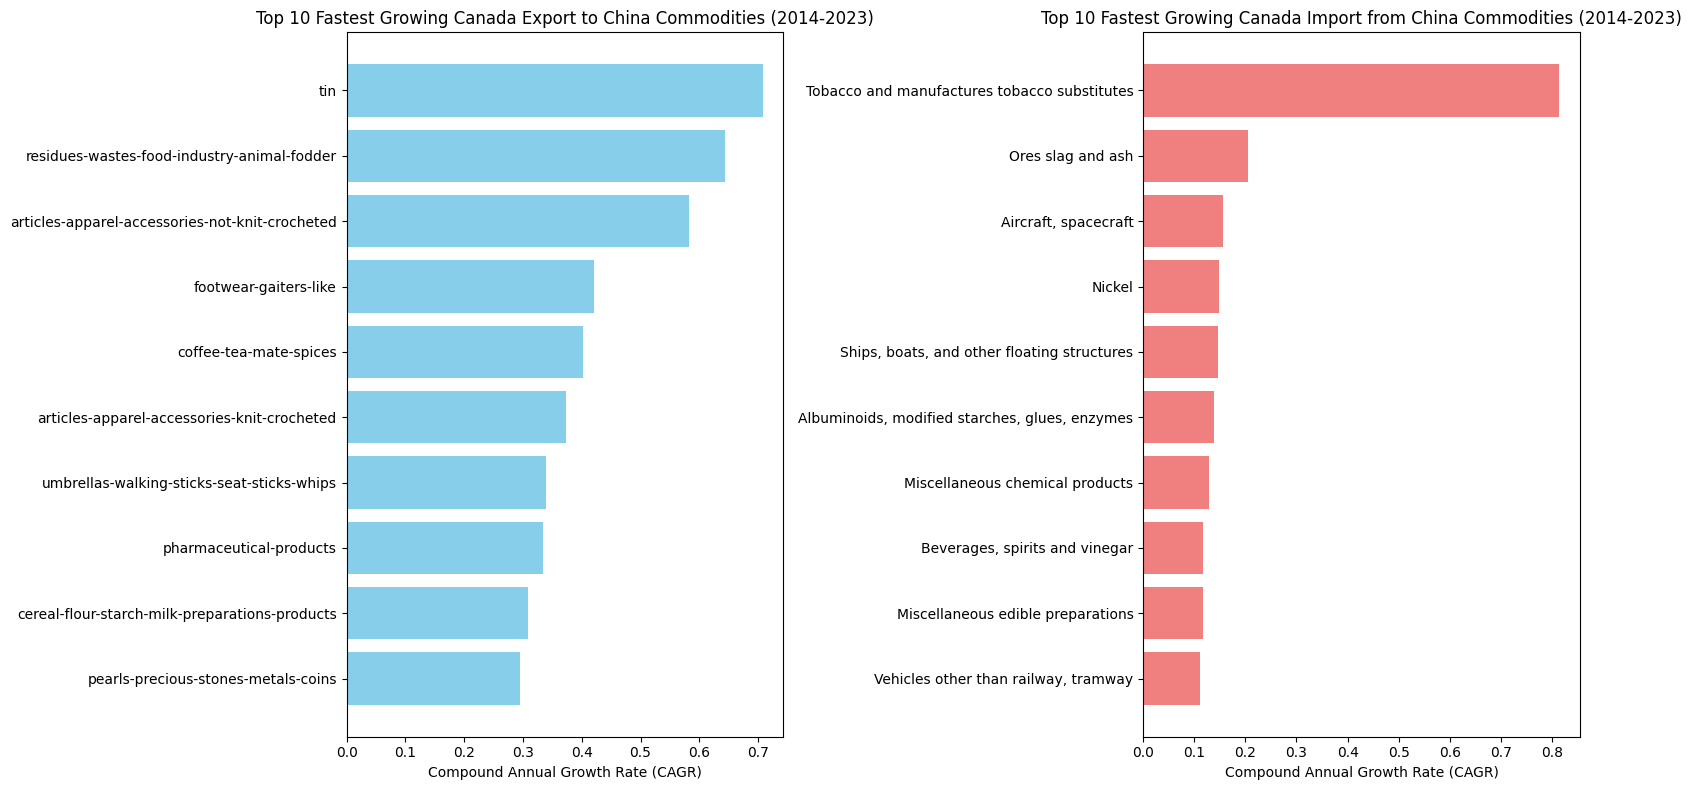

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
export_data = pd.read_csv('/content/Lynch/Canada_Export.csv')
import_data = pd.read_csv('/content/Lynch/Canada_Import.csv')

# 提取商品名称和年份列
years = [str(year) for year in range(2014, 2024)]

# 计算出口数据的年复合增长率（CAGR）
export_data['CAGR'] = (export_data[years[-1]] / export_data[years[0]]) ** (1 / (len(years) - 1)) - 1
top_export_categories = export_data[['Commodities', 'CAGR']].sort_values(by='CAGR', ascending=False).head(10)

# 计算进口数据的年复合增长率（CAGR）
import_data['CAGR'] = (import_data[years[-1]] / import_data[years[0]]) ** (1 / (len(years) - 1)) - 1
top_import_categories = import_data[['Commodities', 'CAGR']].sort_values(by='CAGR', ascending=False).head(10)

# 设置画布和子图
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# 左图：出口
axes[0].barh(top_export_categories['Commodities'], top_export_categories['CAGR'], color='skyblue')
axes[0].set_xlabel('Compound Annual Growth Rate (CAGR)')
axes[0].set_title('Top 10 Fastest Growing Canada Export to China Commodities (2014-2023)')
axes[0].invert_yaxis()

# 右图：进口
axes[1].barh(top_import_categories['Commodities'], top_import_categories['CAGR'], color='lightcoral')
axes[1].set_xlabel('Compound Annual Growth Rate (CAGR)')
axes[1].set_title('Top 10 Fastest Growing Canada Import from China Commodities (2014-2023)')
axes[1].invert_yaxis()

# 显示图表
plt.tight_layout()
plt.show()





---



step 3 Comparison with Total Import/Export Volumes: We can calculate the total annual import and export values and compare the performance of individual categories to the overall trend.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Load the Excel file
xls = pd.ExcelFile('I_M_data.xlsx')

# Load the relevant sheets: 'Import' and 'Export'
import_data = pd.read_excel(xls, sheet_name='Import')
export_data = pd.read_excel(xls, sheet_name='Export')


In [ ]:
# Check the first few rows of the import and export data
print(import_data.head())
print(export_data.head())


                     Date  Electrical, electronic equipment  \
0  12/31/2013 12:00:00 AM                       12313274409   
1  12/31/2014 12:00:00 AM                       12759883096   
2  12/31/2015 12:00:00 AM                       12816619029   
3  12/31/2016 12:00:00 AM                       11920456510   
4  12/31/2017 12:00:00 AM                       13987757868   

   Machinery, nuclear reactors, boilers  Vehicles other than railway, tramway  \
0                           10251170263                            1739003999   
1                           10500522080                            1660497181   
2                            9642964114                            1757783929   
3                            9251409427                            1636449957   
4                           10468636457                            1898660079   

   Furniture, lighting signs, prefabricated buildings  \
0                                         2949215520    
1                   

In [ ]:
# Calculate total imports and exports for each year
import_data['Total Imports'] = import_data.iloc[:, 1:].sum(axis=1)
export_data['Total Exports'] = export_data.iloc[:, 1:].sum(axis=1)


In [ ]:
# Calculate the year-over-year growth rate for imports and exports
import_data['Import Growth Rate'] = import_data['Total Imports'].pct_change() * 100
export_data['Export Growth Rate'] = export_data['Total Exports'].pct_change() * 100


In [ ]:

print(export_data.columns)


Index(['date', 'edible-fruits-nuts-peel-citrus-fruit-melons', 'silk',
       'miscellaneous-edible-preparations',
       'milling-products-malt-starches-inlin-wheat-glute',
       'paper-paperboard-articles-pulp-paper-board', 'pharmaceutical-products',
       'carpets-textile-floor-coverings',
       'dairy-products-eggs-honey-edible-products',
       'meat-fish-seafood-preparations',
       'vegetable-plaiting-materials-vegetable-products',
       'printed-books-newspapers-pictures',
       'oil-seed-oleagic-fruits-grain-seed-fruit',
       'residues-wastes-food-industry-animal-fodder',
       'tobacco-manufactures-tobacco-substitutes',
       'fish-crustaceans-molluscs-aquatics-invertebrates',
       'articles-leather-animal-gut-harness-travel-good',
       'tanning-dyeing-extracts-tannins-pigments', 'beverages-spirits-vinegar',
       'essential-oils-perfumes-cosmetics-toileteries',
       'miscellaneous-manufactured-articles',
       'nuclear-reactors-boilers-machinery',
       'li

In [ ]:
export_data.rename(columns={'date': 'Date'}, inplace=True)


In [ ]:
# Display the total values and growth rates for imports and exports
print(import_data[['Date', 'Total Imports', 'Import Growth Rate']])
print(export_data[['Date', 'Total Exports', 'Export Growth Rate']])


                      Date  Total Imports  Import Growth Rate
0   12/31/2013 12:00:00 AM    51179676839                 NaN
1   12/31/2014 12:00:00 AM    53010859953            3.577950
2   12/31/2015 12:00:00 AM    51332775720           -3.165548
3   12/31/2016 12:00:00 AM    48539575239           -5.441359
4   12/31/2017 12:00:00 AM    54575978006           12.436044
5   12/31/2018 12:00:00 AM    58233747432            6.702160
6   12/31/2019 12:00:00 AM    56469278006           -3.029977
7   12/31/2020 12:00:00 AM    56970838996            0.888202
8   12/31/2021 12:00:00 AM    68498932535           20.235078
9   12/31/2022 12:00:00 AM    76912929778           12.283399
10  12/31/2023 12:00:00 AM    66026782757          -14.153858
        Date  Total Exports  Export Growth Rate
0 2014-12-31   1.743643e+10                 NaN
1 2015-12-31   1.571535e+10           -9.870553
2 2016-12-31   1.577338e+10            0.369230
3 2017-12-31   1.813027e+10           14.942179
4 2018-12-31   2

综上所述：Import Data:
2014: 总进口额增长了 3.58%.
2015: 总进口额下降了 3.17%.
2016: 进口额进一步下降了 5.44%.
2017: 显著恢复，增长了 12.44%.

Export Data:
2015: 总出口额下降了 9.87%.
2016: 出口额略有恢复，增长了 0.37%.
2017: 显著增长了 14.94%.
2018: 进一步增长了 17.60%.


In [ ]:
# Convert the Date column to datetime format
import_data['Date'] = pd.to_datetime(import_data['Date'], errors='coerce')
export_data['Date'] = pd.to_datetime(export_data['Date'], errors='coerce')


NameError: name 'import_data' is not defined

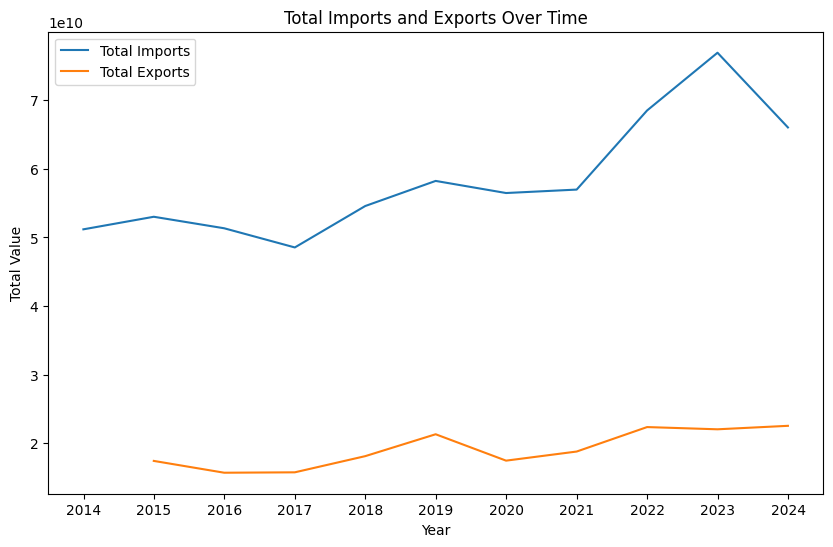

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(import_data['Date'], import_data['Total Imports'], label='Total Imports')
plt.plot(export_data['Date'], export_data['Total Exports'], label='Total Exports')
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.title('Total Imports and Exports Over Time')
plt.legend()
plt.show()



Are there any interesting or unexpected findings in the current trade dynamics?
Analyze the growth trends of import and export categories, comparing the increasing or decreasing trends across different categories.

In [ ]:

# Create a DataFrame with the given data
data = {
    'code': [11, 21, 23, 31, 44, 48, 51, 62, 71],
    '2014': [4166988041, 3033373744, 16016682, 8361361935, 281761570, 906202718, 650379140, 14619094, 5599718],
    '2015': [4528838384, 1672301411, 8475622, 7514947608, 382675342, 972405990, 621508254, 9649065, 4463586],
    '2016': [4601179314, 1685950179, 8134437, 7035088156, 258698374, 1508883187, 662718231, 7930237, 4686647],
    '2017': [5717841430, 2017385583, 5857869, 7735646476, 436105799, 1522090824, 675968425, 15859741, 3456307],
    '2018': [7454540213, 2444134154, 4520001, 8420322589, 789271554, 1408735125, 764754503.5, 29385419, 4878406],
    '2019': [4669747856, 2881373385, 5320981, 7118491997, 474186486, 1430699958, 802166403, 88632294, 4360110],
    '2020': [6472602717, 3938235279, 6400879, 6237838618, 146628558, 1064036062, 724354211, 207892731, 3887221],
    '2021': [6808102854, 6504786184, 3504099, 6716869799, 278935455, 904926575, 809726073, 335518626, 4742962],
    '2022': [7983857967, 5769577901, 3973288, 6263449292, 200364044, 802200068, 809154099, 203949836, 6069079],
    '2023': [8840130551, 5978815971, 3313069, 5617357291, 477226764, 678760087, 770957286, 195439377, 4289996]
}

df = pd.DataFrame(data, index=['Agriculture, Forestry, Fishing and Hunting', 'Mining, Quarrying, and Oil and Gas Extraction',
                               'Construction', 'Manufacturing', 'Retail Trade', 'Transportation and Warehousing',
                               'Information and Cultural Industries', 'Health Care and Social Assistance',
                               'Arts, Entertainment, and Recreation'])



In [ ]:
print(df) #check whether df created

                                               code        2014        2015  \
Agriculture, Forestry, Fishing and Hunting       11  4166988041  4528838384   
Mining, Quarrying, and Oil and Gas Extraction    21  3033373744  1672301411   
Construction                                     23    16016682     8475622   
Manufacturing                                    31  8361361935  7514947608   
Retail Trade                                     44   281761570   382675342   
Transportation and Warehousing                   48   906202718   972405990   
Information and Cultural Industries              51   650379140   621508254   
Health Care and Social Assistance                62    14619094     9649065   
Arts, Entertainment, and Recreation              71     5599718     4463586   

                                                     2016        2017  \
Agriculture, Forestry, Fishing and Hunting     4601179314  5717841430   
Mining, Quarrying, and Oil and Gas Extraction  1685950179  2017

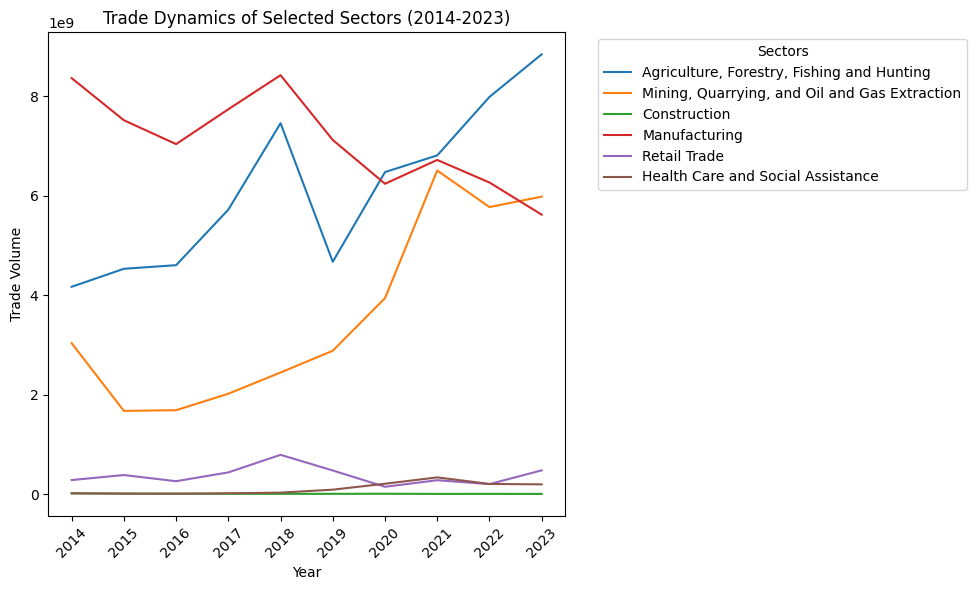

In [ ]:

# Plotting the data for interesting sectors

# List of selected sectors for plotting
sectors = ['Agriculture, Forestry, Fishing and Hunting', 'Mining, Quarrying, and Oil and Gas Extraction',
           'Construction', 'Manufacturing', 'Retail Trade', 'Health Care and Social Assistance']

# Years to plot on x-axis
years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

# Plot each sector's data
plt.figure(figsize=(10, 6))

for sector in sectors:
    plt.plot(years, df.loc[sector, years], label=sector)

# Add title and labels
plt.title('Trade Dynamics of Selected Sectors (2014-2023)')
plt.xlabel('Year')
plt.ylabel('Trade Volume')
plt.xticks(rotation=45)
plt.legend(title='Sectors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show plot
plt.show()


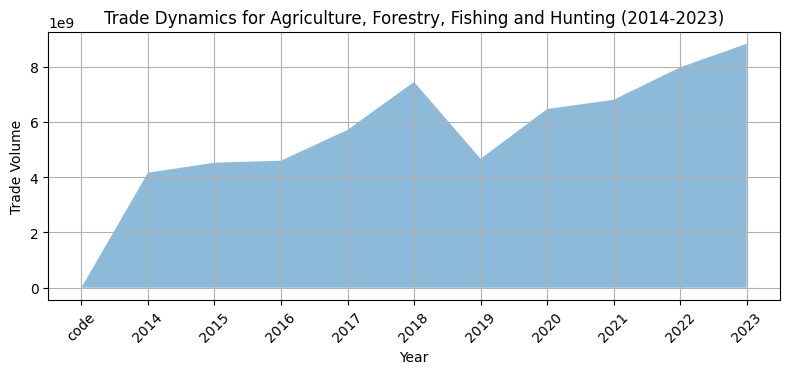

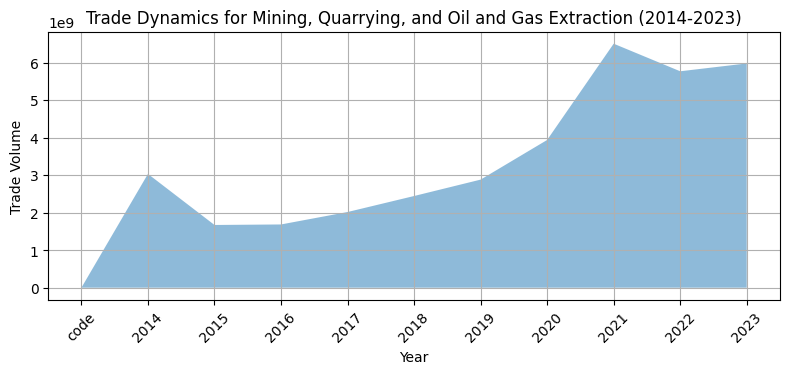

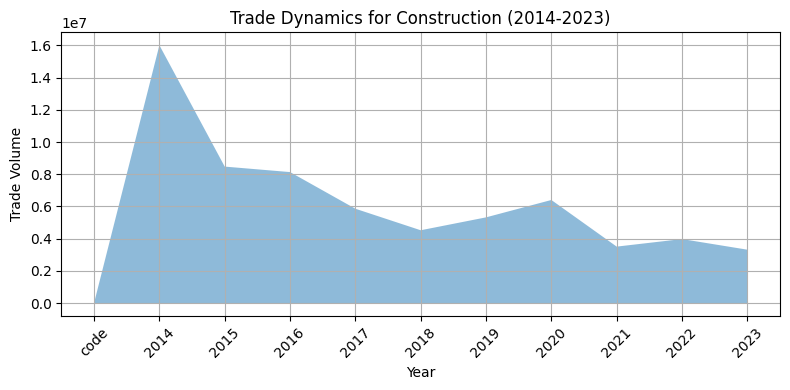

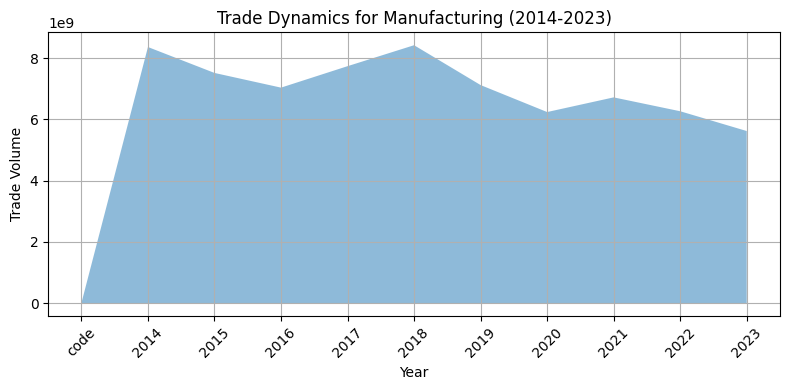

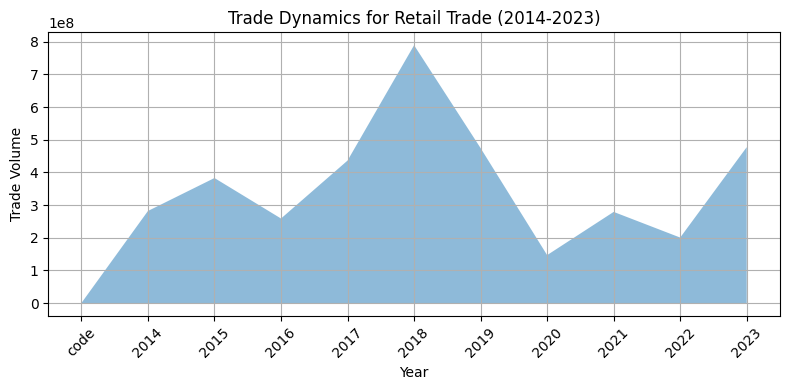

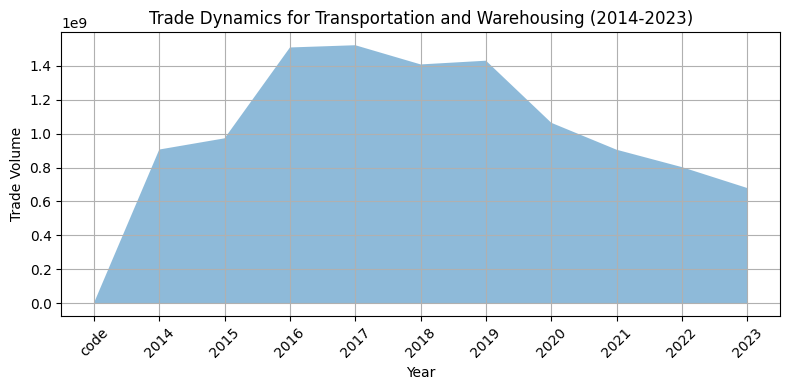

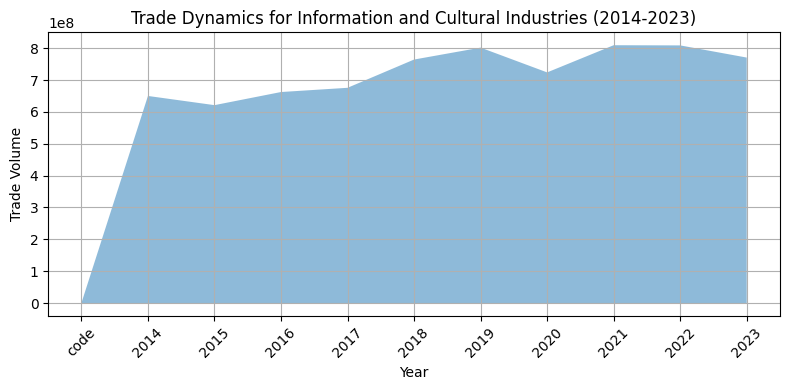

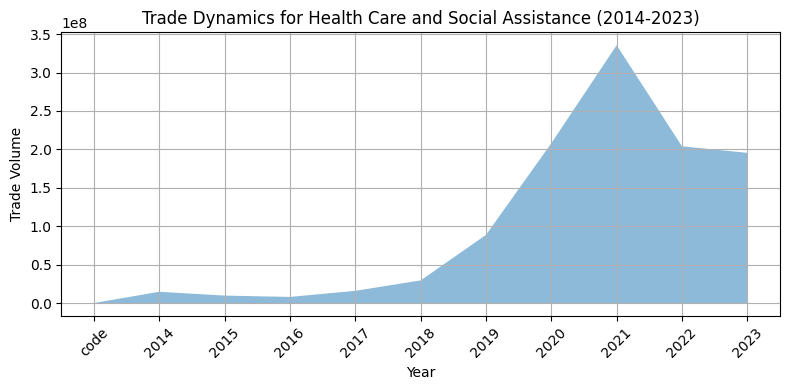

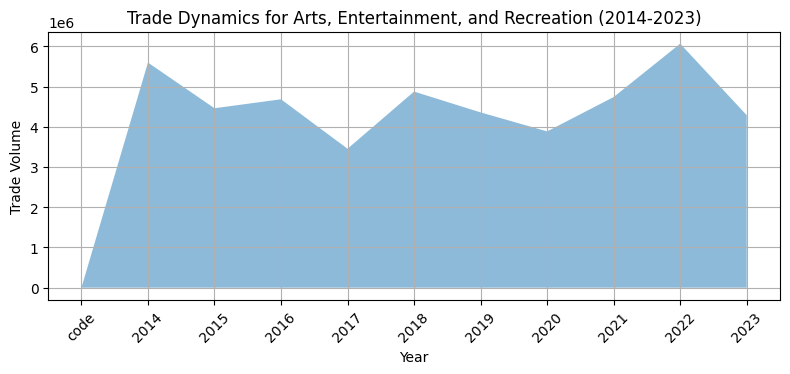

In [ ]:
import matplotlib.pyplot as plt

# As 'df' is already loaded and contains industry names as the index and years as columns
years = df.columns  # Get the years (column names)

# Loop through each industry and create a separate area plot
for sector in df.index:
    plt.figure(figsize=(8, 4))  # Set figure size
    plt.fill_between(years, df.loc[sector], alpha=0.5)  # Draw the area plot
    plt.title(f'Trade Dynamics for {sector} (2014–2023)')  # Set the title
    plt.xlabel('Year')  # X-axis label
    plt.ylabel('Trade Volume')  # Y-axis label
    plt.xticks(rotation=45)  # Rotate X-axis labels to avoid overlap
    plt.grid(True)  # Add grid lines
    plt.tight_layout()  # Adjust layout automatically
    plt.show()  # Display the plot




4.external factors impacted past trade

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
file_path = r'C:/Users/cmj/Desktop/I_M_data.xlsx'
import_data = pd.read_excel(file_path, sheet_name='Import')
export_data = pd.read_excel(file_path, sheet_name='Export')
print("Import Data:")
print(import_data.head())
print("\nExport Data:")
print(export_data.head())

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/cmj/Desktop/I_M_data.xlsx'

In [ ]:
focused_categories = ['live-trees-plants-bulbs-roots-cut-flowers','arms-ammunition-parts-accessories']
plt.figure(figsize=(10, 6))
for category in focused_categories:
    plt.plot(export_data['date'], export_data[category], label=category)
plt.title('Export Trends for Abnormal Categories (2014-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Export Value (in USD)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Categories")
plt.tight_layout()
plt.show()

In [ ]:
tobacco_category = ['tobacco-manufactures-tobacco-substitutes']
plt.figure(figsize=(10, 6))
for category in tobacco_category:
    plt.plot(export_data['date'], export_data[category], label=category)
plt.title('Export Trend for Tobacco-Manufactures-Tobacco-Substitutes (2014-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Export Value (in USD)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.tight_layout()
plt.show()

In [ ]:
abnormal_categories = ["Other made textile articles, sets, worn clothing","Iron and steel","Miscellaneous chemical products", "Base metals not specified elsewhere, cermets"]
plt.figure(figsize=(12, 8))
for column in abnormal_categories:
    plt.plot(import_data['Date'], import_data[column], label=column)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Trends of Selected Categories with >80% Changes')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

#2. Most Traded Commodities

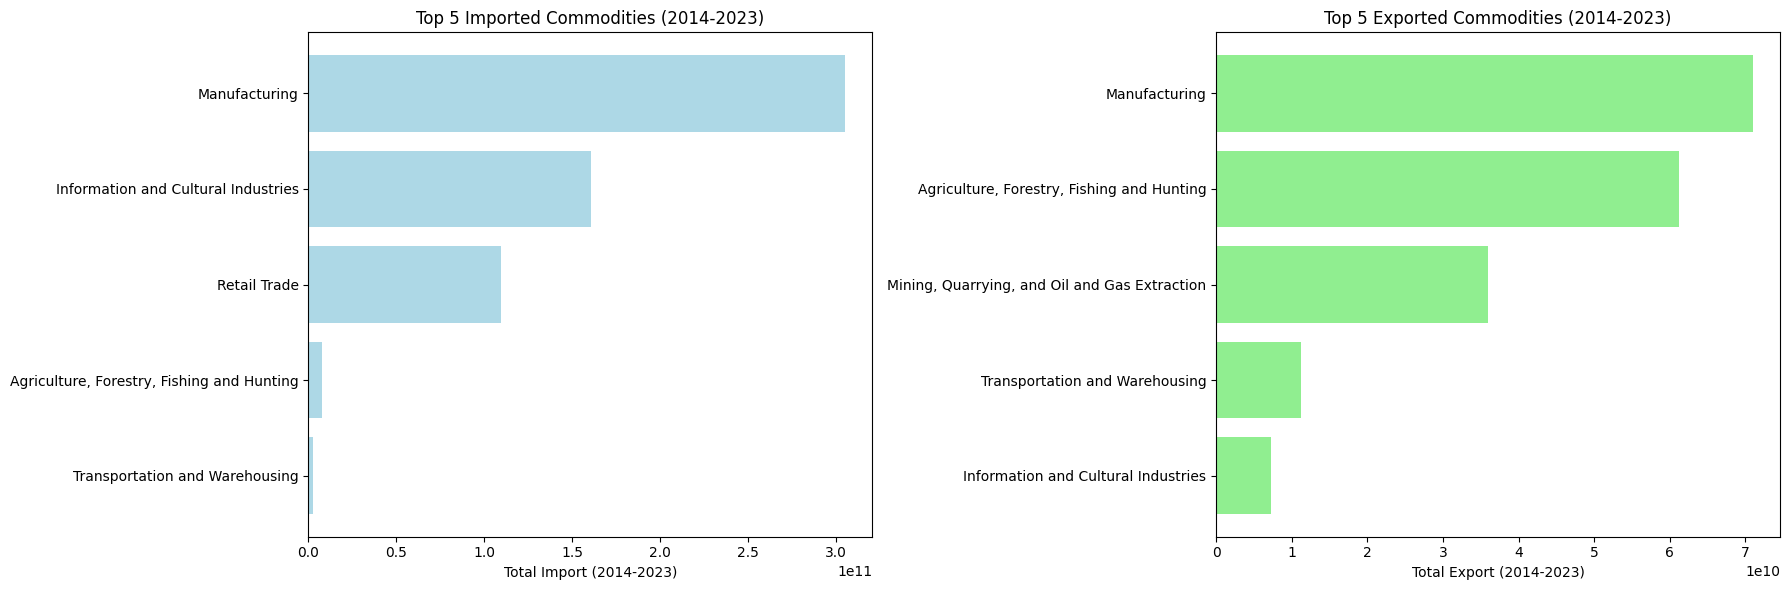

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import_data = pd.read_csv('I_type.csv')
export_data = pd.read_csv('E_type.csv')
i_detail = pd.read_csv('I_Detail.csv')
e_detail = pd.read_csv('E_Detail.csv')

import_data['Total Import'] = import_data.loc[:, '2014':'2023'].sum(axis=1)

export_data['Total Export'] = export_data.loc[:, '2014':'2023'].sum(axis=1)

combined_data = pd.merge(import_data[['Type', 'Code', 'Total Import']],
                         export_data[['Type', 'Code', 'Total Export']],
                         on=['Type', 'Code'], how='outer')

import_sorted = combined_data.sort_values(by='Total Import', ascending=False)
top_imports = import_sorted[['Type', 'Code', 'Total Import']].head(5)
export_sorted = combined_data.sort_values(by='Total Export', ascending=False)
top_exports = export_sorted[['Type', 'Code', 'Total Export']].head(5)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].barh(top_imports['Type'], top_imports['Total Import'], color='lightblue')
axes[0].set_xlabel('Total Import (2014-2023)')
axes[0].set_title('Top 5 Imported Commodities (2014-2023)')
axes[0].invert_yaxis()

axes[1].barh(top_exports['Type'], top_exports['Total Export'], color='lightgreen')
axes[1].set_xlabel('Total Export (2014-2023)')
axes[1].set_title('Top 5 Exported Commodities (2014-2023)')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

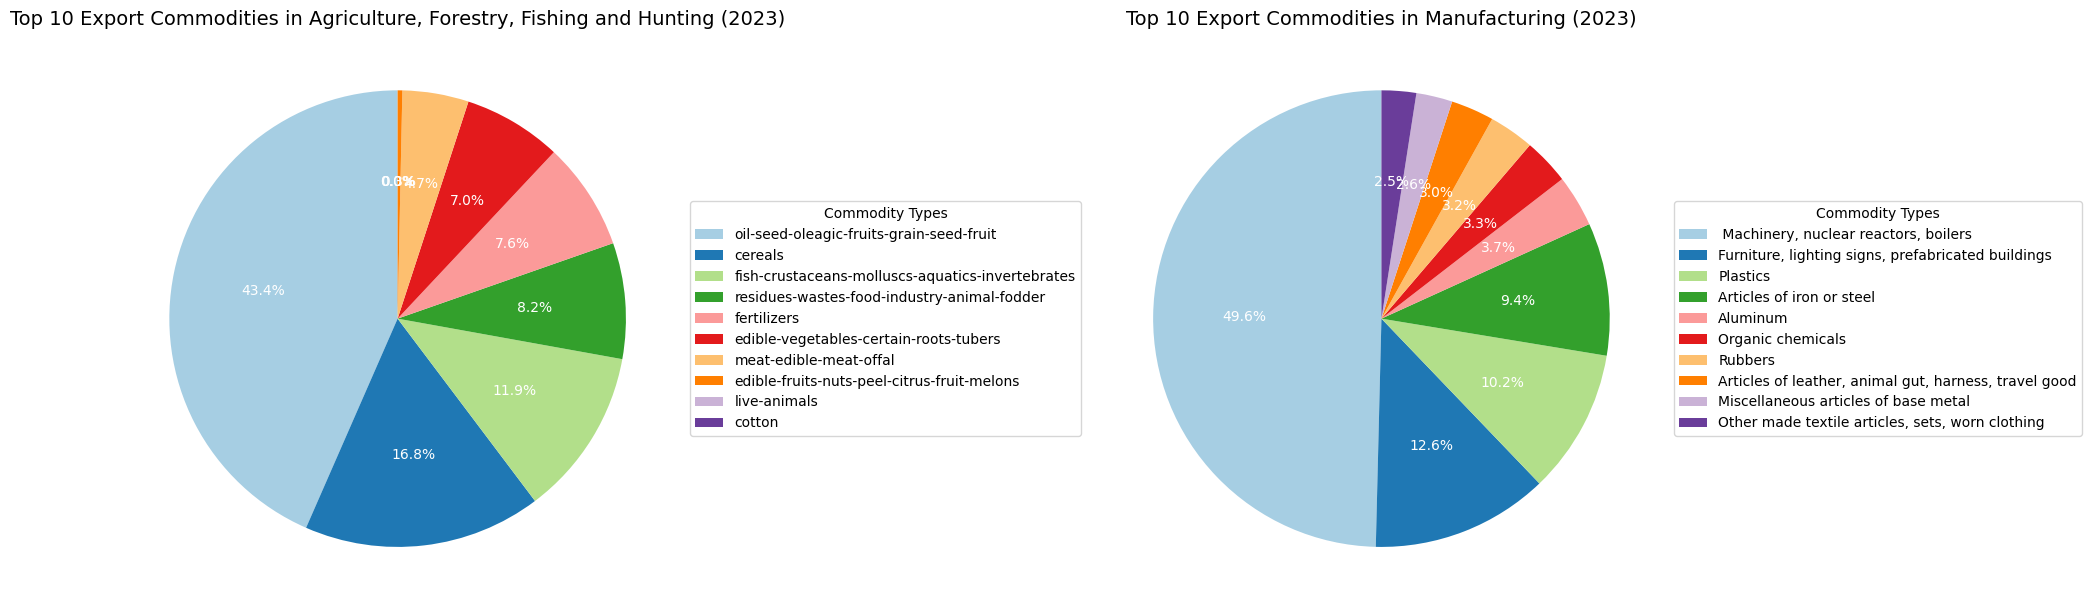

In [ ]:
i_filtered = i_detail[i_detail['Code'] == 31]
i_filtered.set_index('Type', inplace=True)
i_filtered_years = i_filtered.T[1:]
i_top_10 = i_filtered_years.loc['2023'].nlargest(10)

e_filtered = e_detail[e_detail['Code'] == 11]
e_filtered.set_index('Type', inplace=True)
e_filtered_years = e_filtered.T[1:]
e_top_10 = e_filtered_years.loc['2023'].nlargest(10)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

e_wedges, _, e_autotexts = axes[0].pie(
    e_top_10, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors
)
axes[0].legend(e_wedges, e_top_10.index, title="Commodity Types", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
axes[0].set_title('Top 10 Export Commodities in Agriculture, Forestry, Fishing and Hunting (2023)', fontsize=14)
for autotext in e_autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('white')

i_wedges, _, i_autotexts = axes[1].pie(
    i_top_10, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors
)
axes[1].legend(i_wedges, i_top_10.index, title="Commodity Types", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
axes[1].set_title('Top 10 Export Commodities in Manufacturing (2023)', fontsize=14)
for autotext in i_autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('white')

plt.tight_layout()
plt.show()

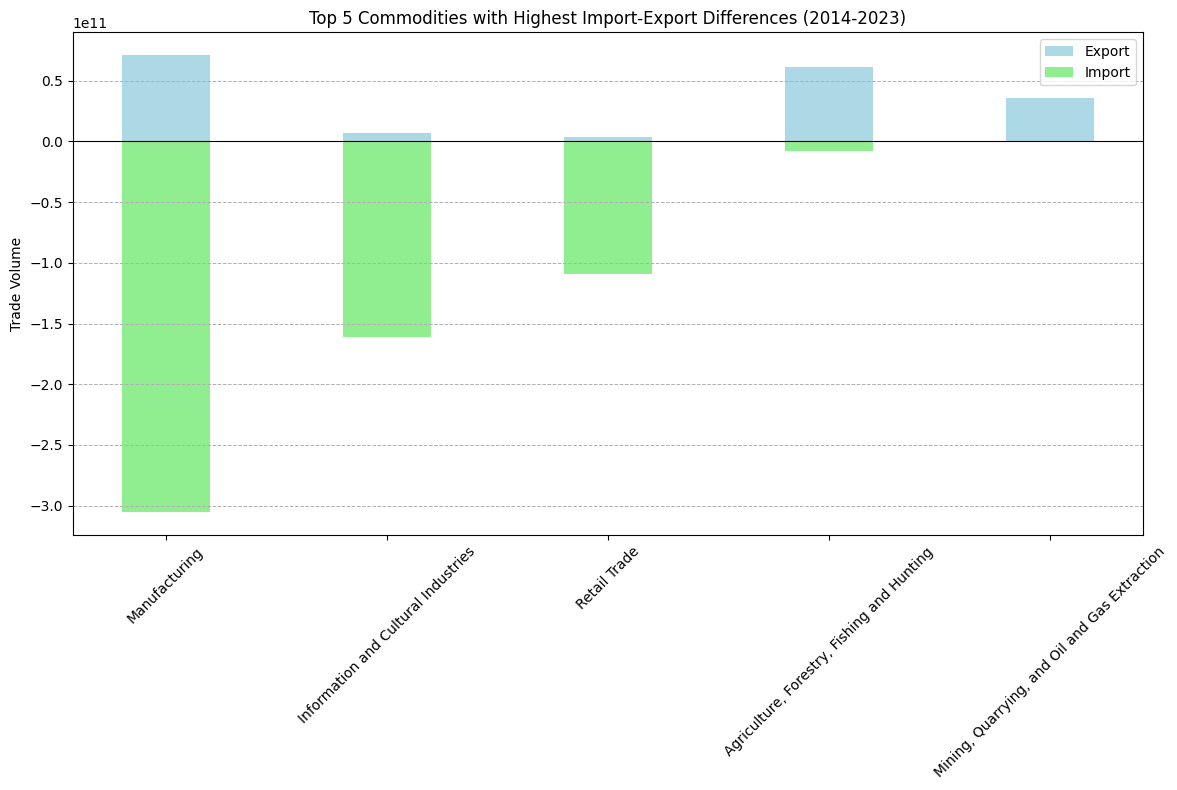

In [ ]:
combined_data['Difference'] = combined_data['Total Export'].fillna(0) - combined_data['Total Import'].fillna(0)
top_5_difference = combined_data.reindex(combined_data['Difference'].abs().nlargest(5).index)
plt.figure(figsize=(12, 8))
x_pos = np.arange(len(top_5_difference))


bar_width = 0.4
for i in range(len(top_5_difference)):
    total_import = top_5_difference.iloc[i]['Total Import']
    total_export = top_5_difference.iloc[i]['Total Export']
    commodity_type = top_5_difference.iloc[i]['Type']

    plt.bar(x_pos[i], total_export, width=bar_width, color='lightblue', label='Export' if i == 0 else "")
    plt.bar(x_pos[i], -total_import, width=bar_width, color='lightgreen', label='Import' if i == 0 else "")

plt.xticks(x_pos, top_5_difference['Type'], rotation=45)
plt.ylabel('Trade Volume')
plt.title('Top 5 Commodities with Highest Import-Export Differences (2014-2023)')
plt.axhline(0, color='black', lw=0.8)
plt.legend()
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()


# external factors

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
file_path = r'I_E_data.xlsx'
import_data = pd.read_excel(file_path, sheet_name='Import')
export_data = pd.read_excel(file_path, sheet_name='Export')
print("Import Data:")
print(import_data.head())
print("\nExport Data:")
print(export_data.head())

Import Data:
        Date  Electrical, electronic equipment  \
0 2014-12-31                       12313274409   
1 2015-12-31                       12759883096   
2 2016-12-31                       12816619029   
3 2017-12-31                       11920456510   
4 2018-12-31                       13987757868   

   Machinery, nuclear reactors, boilers  Vehicles other than railway, tramway  \
0                           10251170263                            1739003999   
1                           10500522080                            1660497181   
2                            9642964114                            1757783929   
3                            9251409427                            1636449957   
4                           10468636457                            1898660079   

   Furniture, lighting signs, prefabricated buildings  \
0                                         2949215520    
1                                         2999998641    
2                           

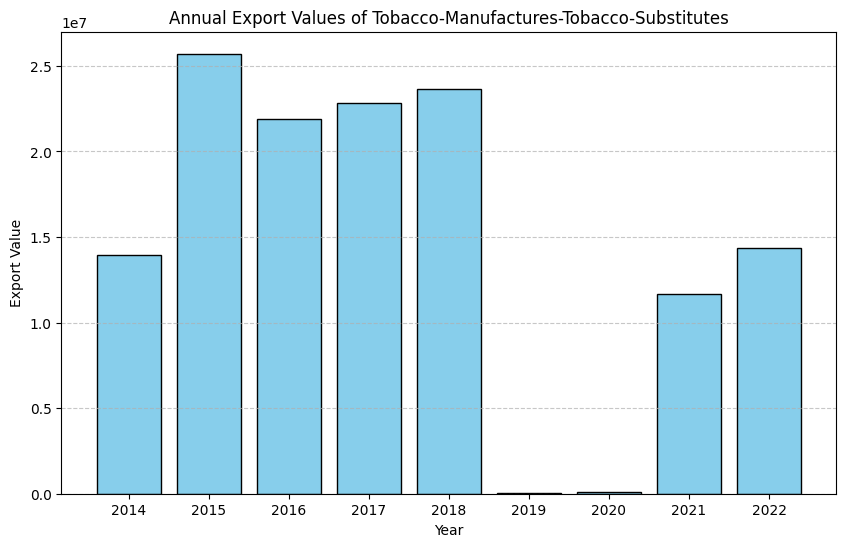

In [ ]:
import matplotlib.pyplot as plt
years = ["2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]
tobacco_export_values = [
    13940938, 25712550, 21899037, 22856621, 23643198,
    62998, 76779, 11646650, 14375428
]
plt.figure(figsize=(10, 6))
plt.bar(years, tobacco_export_values, color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Export Value')
plt.title('Annual Export Values of Tobacco-Manufactures-Tobacco-Substitutes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

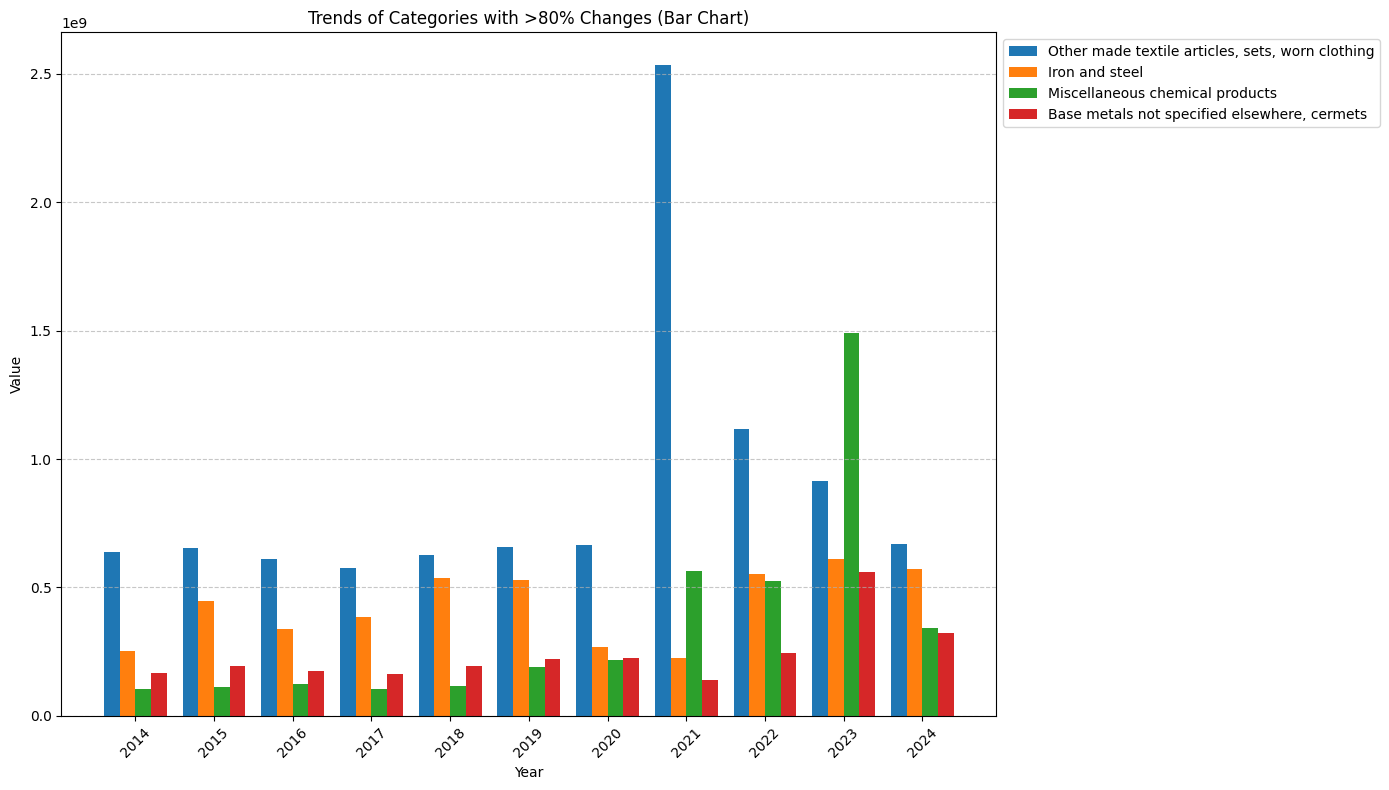

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
abnormal_categories = ["Other made textile articles, sets, worn clothing", "Iron and steel",
                       "Miscellaneous chemical products", "Base metals not specified elsewhere, cermets"]
years = import_data['Date']
x = np.arange(len(years))
width = 0.2
plt.figure(figsize=(14, 8))
for i, column in enumerate(abnormal_categories):
    plt.bar(x + i * width, import_data[column], width, label=column)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Trends of Categories with >80% Changes (Bar Chart)')
plt.xticks(x + width * (len(abnormal_categories) - 1) / 2, years.dt.year, rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

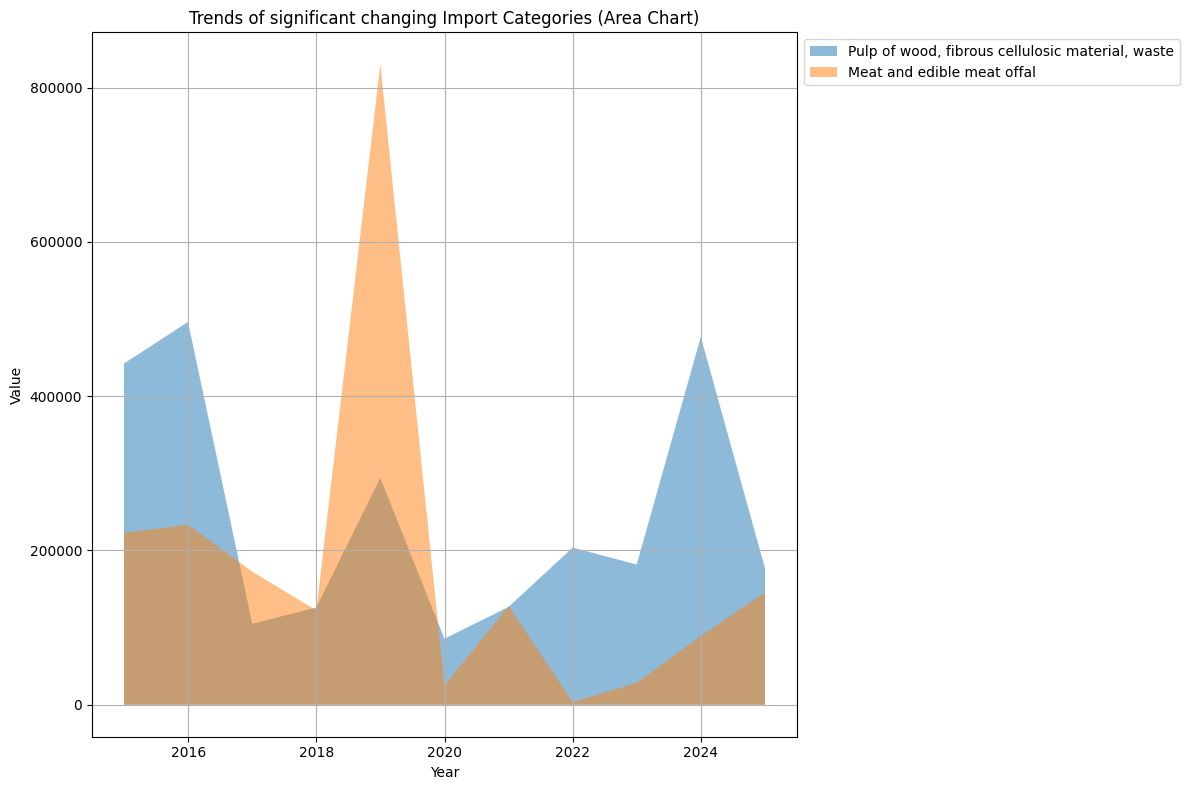

In [ ]:
import_data = pd.read_excel(file_path, sheet_name='Import')
categories = ["Pulp of wood, fibrous cellulosic material, waste", "Meat and edible meat offal"]
import_data['Date'] = pd.to_datetime(import_data['Date'], errors='coerce')
plt.figure(figsize=(12, 8))
for category in categories:
    plt.fill_between(import_data['Date'], import_data[category], label=category, alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Trends of significant changing Import Categories (Area Chart)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

# Modeling

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
df = pd.read_csv("I_M.csv",thousands=',')

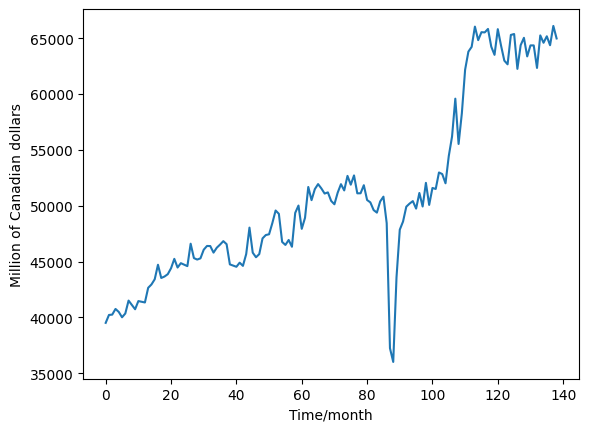

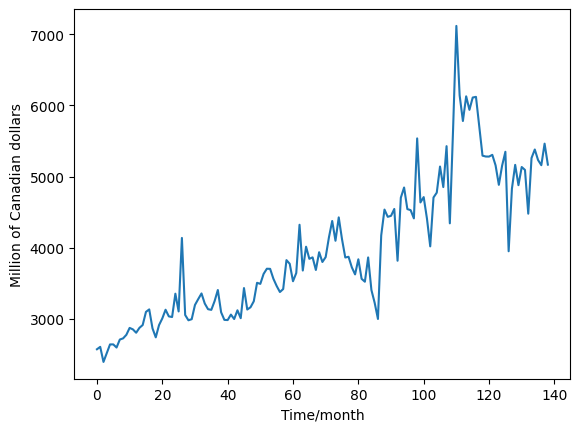

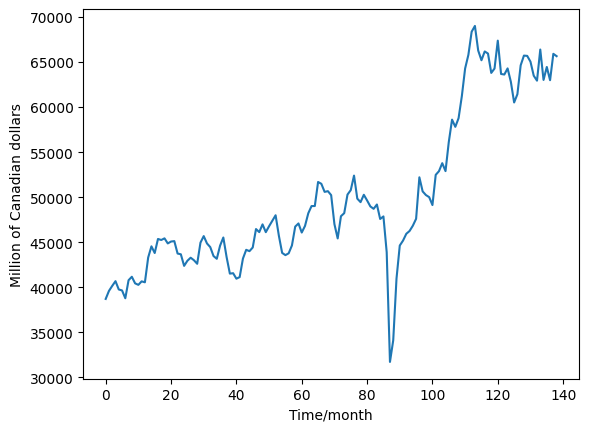

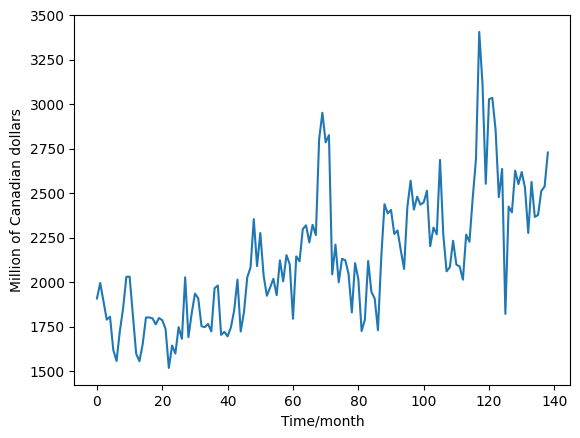

In [ ]:
col = ['All _Im','China_Im','All_Ex','China_Ex']
for c in col:
    plt.plot(df[c])

    plt.xlabel('Time/month')
    plt.ylabel('Million of Canadian dollars')
    plt.show()

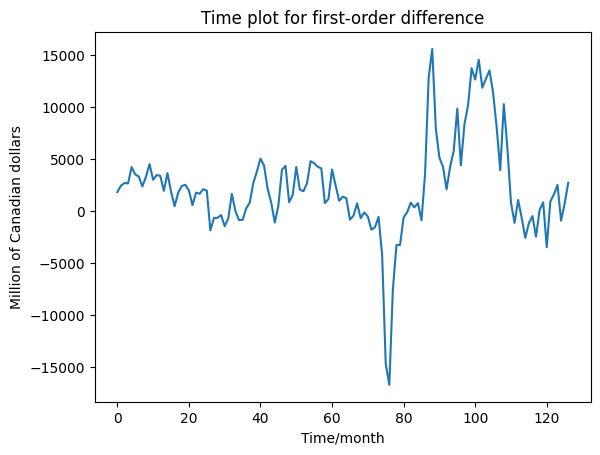

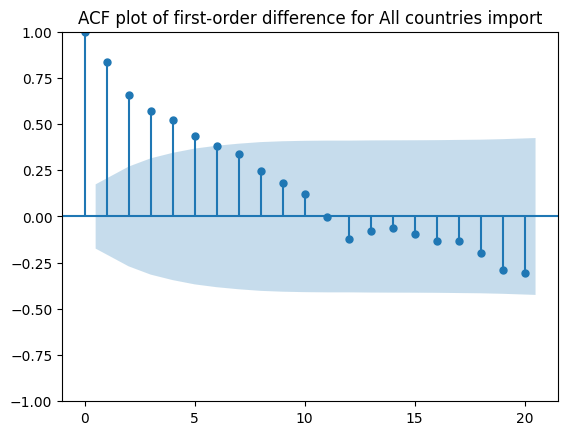

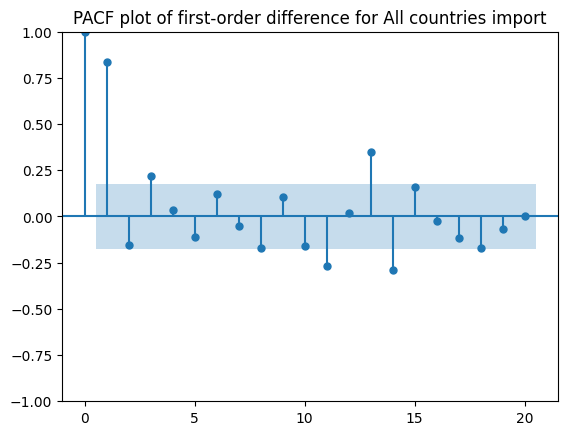

In [ ]:
#  Seaonal difference and ACF, PACF
X = df['All _Im'].values
SeasDiff = list()
for i in range(12, len(X)):
    value = X[i] - X[i - 12]
    SeasDiff.append(value)

plt.plot(SeasDiff)
plt.title('Time plot for first-order difference')
plt.xlabel('Time/month')
plt.ylabel('Million of Canadian dollars')
plt.show()

plot_acf(SeasDiff, title='ACF plot of first-order difference for All countries import', lags=20)
plot_pacf(SeasDiff, title='PACF plot of first-order difference for All countries import', lags=20)
plt.show()

In [ ]:
# fit model
arima_AI = ARIMA(df['All _Im'][0:-7],order=(2,1,6))
arima_result_AI = arima_AI.fit()
print(arima_result_AI.summary())


                               SARIMAX Results                                
Dep. Variable:                All _Im   No. Observations:                  132
Model:                 ARIMA(2, 1, 6)   Log Likelihood               -1163.006
Date:                Thu, 17 Oct 2024   AIC                           2344.013
Time:                        06:55:12   BIC                           2369.890
Sample:                             0   HQIC                          2354.528
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2966      0.090    -14.415      0.000      -1.473      -1.120
ar.L2         -0.9090      0.087    -10.483      0.000      -1.079      -0.739
ma.L1          1.3667      0.101     13.532      0.0

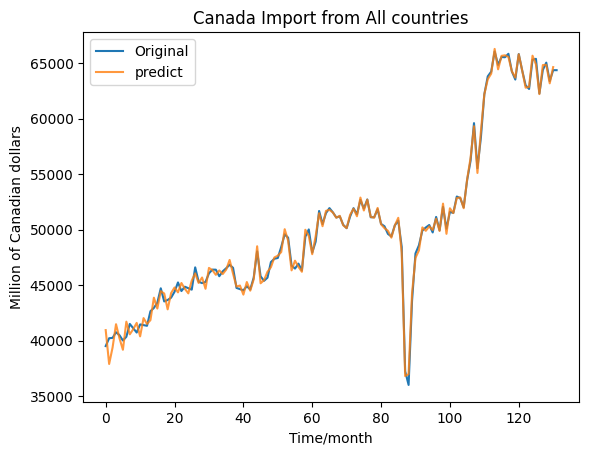

In [ ]:
predict_AI = arima_result_AI.get_prediction(steps=12)
predict_value_AI = predict_AI.predicted_mean[1:].tolist()

plt.plot(df['All _Im'][:-7],label='Original')
plt.plot(predict_value_AI,label='predict', alpha=0.8)

plt.title('Canada Import from All countries')
plt.xlabel('Time/month')
plt.ylabel('Million of Canadian dollars')
plt.legend()
plt.show()

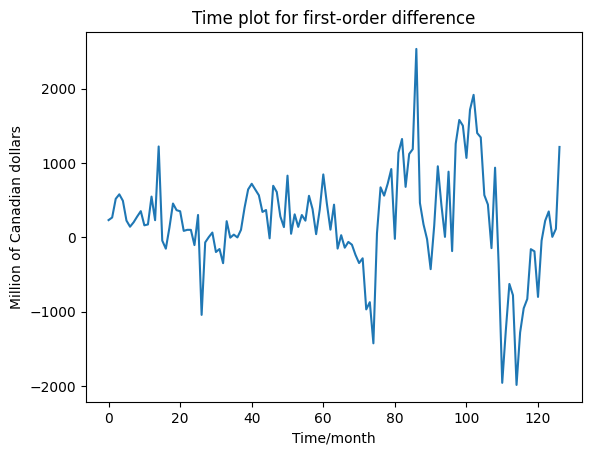

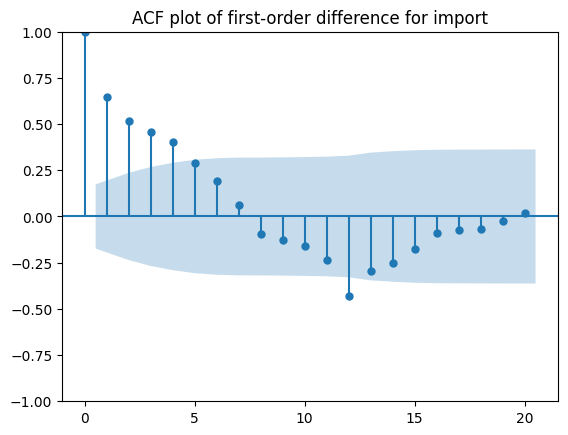

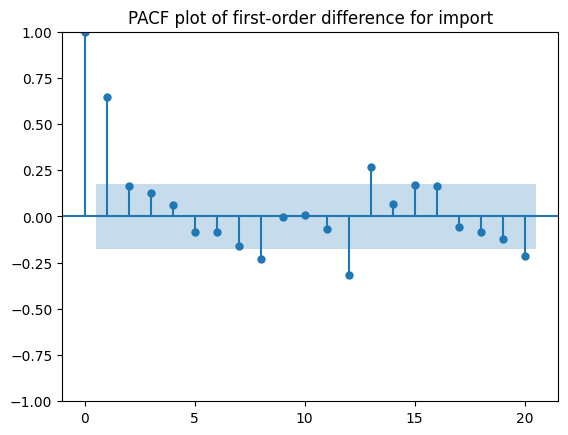

In [ ]:
#  Seaonal difference
X = df['China_Im'].values
SeasDiff = list()
for i in range(12, len(X)):
    value = X[i] - X[i - 12]
    SeasDiff.append(value)

X = df['China_Im'].values
SeasDiff = list()
for i in range(12, len(X)):
    value = X[i] - X[i - 12]
    SeasDiff.append(value)

plt.plot(SeasDiff)
plt.title('Time plot for first-order difference')
plt.xlabel('Time/month')
plt.ylabel('Million of Canadian dollars')
plt.show()

plot_acf(SeasDiff, title='ACF plot of first-order difference for import', lags=20)
plot_pacf(SeasDiff, title='PACF plot of first-order difference for import', lags=20)
plt.show()

In [ ]:
arima_CI = ARIMA(df['China_Im'][0:-7],order=(2,1,5))
arima_result_CI = arima_CI.fit()
print(arima_result_CI.summary())


                               SARIMAX Results                                
Dep. Variable:               China_Im   No. Observations:                  132
Model:                 ARIMA(2, 1, 5)   Log Likelihood                -956.083
Date:                Thu, 17 Oct 2024   AIC                           1928.166
Time:                        06:54:52   BIC                           1951.167
Sample:                             0   HQIC                          1937.512
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6325      0.059     10.640      0.000       0.516       0.749
ar.L2         -0.9312      0.087    -10.721      0.000      -1.101      -0.761
ma.L1         -1.1128      0.088    -12.660      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


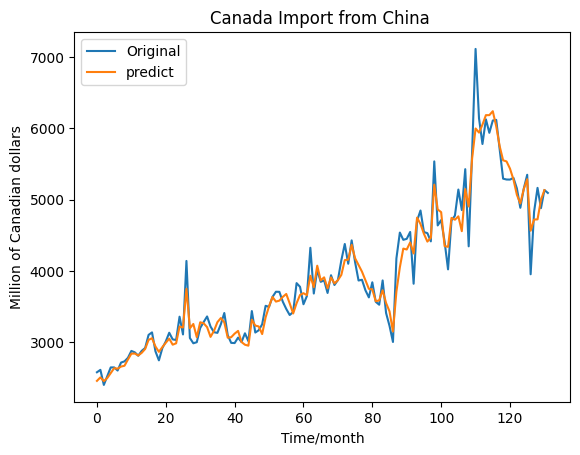

In [ ]:
predict_CI = arima_result_CI.get_prediction(steps=12)
predict_value_CI = predict_CI.predicted_mean[1:].tolist()

plt.plot(df['China_Im'][:-7],label='Original')
plt.plot(predict_value_CI,label='predict')

plt.title('Canada Import from China ')
plt.xlabel('Time/month')
plt.ylabel('Million of Canadian dollars')
plt.legend()
plt.show()

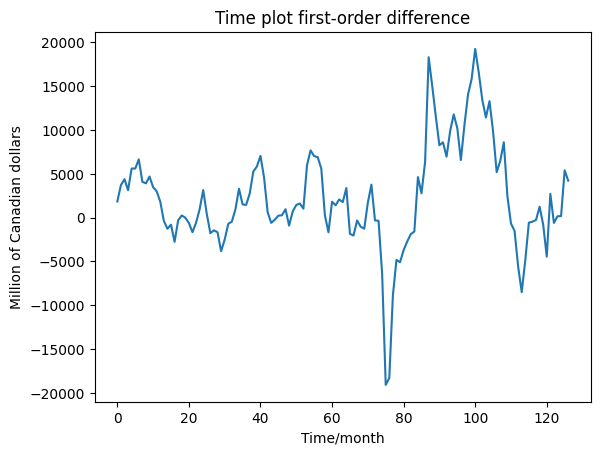

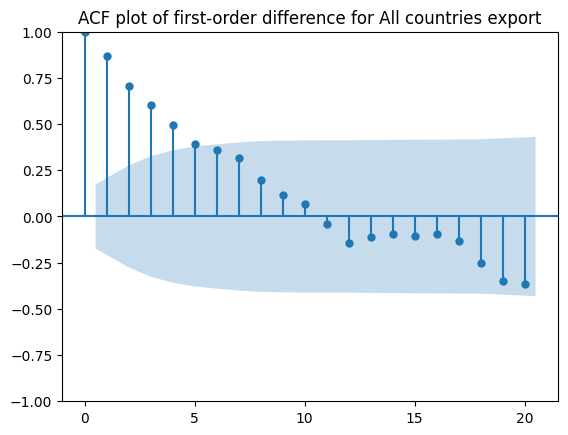

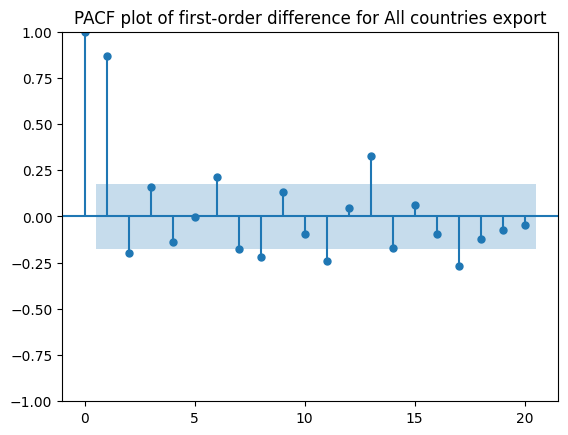

In [ ]:
#  Seaonal difference
X = df['All_Ex'].values
SeasDiff = list()
for i in range(12, len(X)):
    value = X[i] - X[i - 12]
    SeasDiff.append(value)

X = df['All_Ex'].values
SeasDiff = list()
for i in range(12, len(X)):
    value = X[i] - X[i - 12]
    SeasDiff.append(value)

plt.plot(SeasDiff)
plt.title('Time plot first-order difference')
plt.xlabel('Time/month')
plt.ylabel('Million of Canadian dollars')
plt.show()

plot_acf(SeasDiff, title='ACF plot of first-order difference for All countries export', lags=20)
plot_pacf(SeasDiff, title='PACF plot of first-order difference for All countries export', lags=20)
plt.show()

In [ ]:
arima_AE = ARIMA(df['All_Ex'][0:-7],order=(2,1,6))
arima_result_AE = arima_AE.fit()
print(arima_result_AE.summary())

                               SARIMAX Results                                
Dep. Variable:                 All_Ex   No. Observations:                  132
Model:                 ARIMA(2, 1, 6)   Log Likelihood               -1170.543
Date:                Thu, 17 Oct 2024   AIC                           2359.086
Time:                        06:56:10   BIC                           2384.963
Sample:                             0   HQIC                          2369.601
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6698      0.138     -4.847      0.000      -0.941      -0.399
ar.L2         -0.8535      0.152     -5.628      0.000      -1.151      -0.556
ma.L1          0.7874      0.150      5.254      0.0

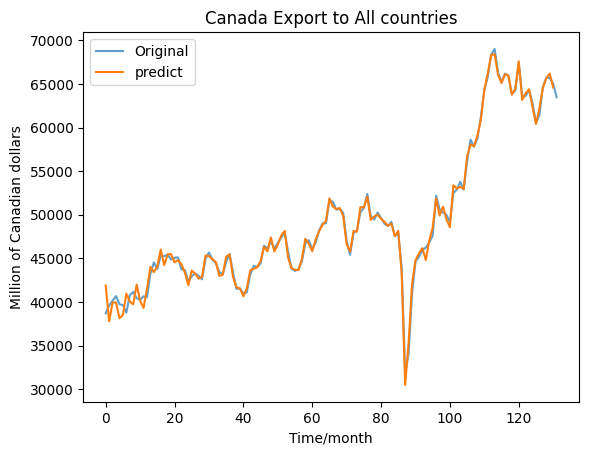

In [ ]:
predict_AE = arima_result_AE.get_prediction(steps=12)
predict_value_AE = predict_AE.predicted_mean[1:].tolist()
predict_value_AE

plt.plot(df['All_Ex'][:-7],label='Original',alpha=0.7)
plt.plot(predict_value_AE,label='predict')

plt.title('Canada Export to All countries')
plt.xlabel('Time/month')
plt.ylabel('Million of Canadian dollars')
plt.legend()
plt.show()

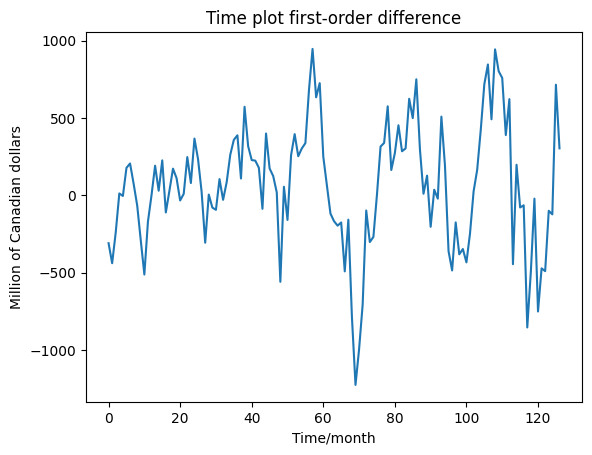

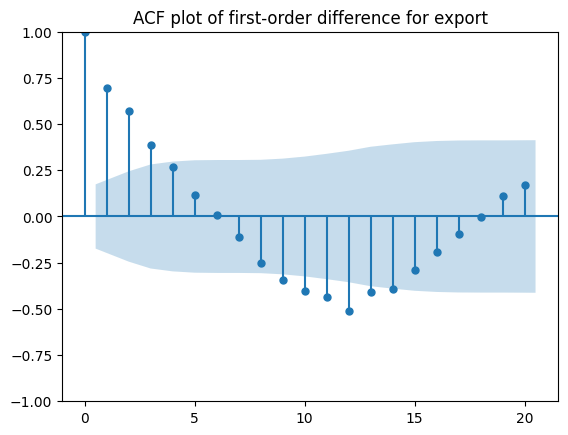

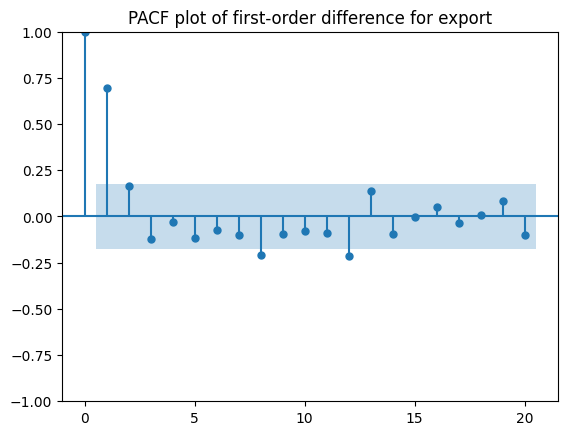

In [ ]:
#  Seaonal difference
X = df['China_Ex'].values
SeasDiff = list()
for i in range(12, len(X)):
    value = X[i] - X[i - 12]
    SeasDiff.append(value)

X = df['China_Ex'].values
SeasDiff = list()
for i in range(12, len(X)):
    value = X[i] - X[i - 12]
    SeasDiff.append(value)

plt.plot(SeasDiff)
plt.title('Time plot first-order difference')
plt.xlabel('Time/month')
plt.ylabel('Million of Canadian dollars')
plt.show()

plot_acf(SeasDiff, title='ACF plot of first-order difference for export', lags=20)
plot_pacf(SeasDiff, title='PACF plot of first-order difference for export', lags=20)
plt.show()

In [ ]:
arima_CE = ARIMA(df['China_Ex'][0:-7],order=(2,1,5))
arima_result_CE = arima_CE.fit()
print(arima_result_CE.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:               China_Ex   No. Observations:                  132
Model:                 ARIMA(2, 1, 5)   Log Likelihood                -884.269
Date:                Thu, 17 Oct 2024   AIC                           1784.539
Time:                        06:56:54   BIC                           1807.540
Sample:                             0   HQIC                          1793.885
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8705      0.158     11.805      0.000       1.560       2.181
ar.L2         -0.9182      0.171     -5.357      0.000      -1.254      -0.582
ma.L1         -2.2438      0.206    -10.885      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


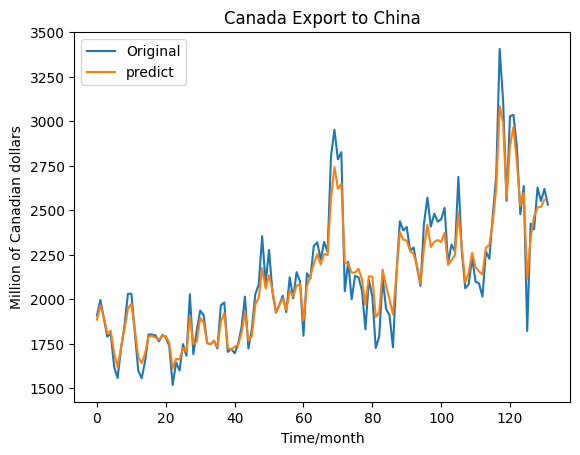

In [ ]:
predict_CE = arima_result_CE.get_prediction(steps=12)
predict_value_CE = predict_CE.predicted_mean[1:].tolist()
predict_value_CE

plt.plot(df['China_Ex'][:-7],label='Original')
plt.plot(predict_value_CE,label='predict')

plt.title('Canada Export to China')
plt.xlabel('Time/month')
plt.ylabel('Million of Canadian dollars')
plt.legend()
plt.show()

# forecast

In [ ]:
forecast_AI = arima_result_AI.get_forecast(steps=12)
predicted_mean = forecast_AI.predicted_mean
confidence_intervals = forecast_AI.conf_int()
print(predicted_mean)


132    64313.655765
133    64121.687588
134    64317.569085
135    64276.293465
136    64142.760971
137    64355.317717
138    64201.091392
139    64207.857358
140    64339.268830
141    64162.730918
142    64272.183166
143    64290.731857
Name: predicted_mean, dtype: float64


In [ ]:
forecast_CI = arima_result_CI.get_forecast(steps=12)
predicted_mean = forecast_CI.predicted_mean
confidence_intervals = forecast_CI.conf_int()
print(predicted_mean)

132    4943.897573
133    4861.922123
134    4961.487195
135    5138.165947
136    5149.055358
137    4991.419521
138    4881.573342
139    4958.885435
140    5110.074861
141    5133.710281
142    5007.872090
143    4906.269081
Name: predicted_mean, dtype: float64


In [ ]:
forecast_AE = arima_result_AE.get_forecast(steps=12)
predicted_mean = forecast_AE.predicted_mean
confidence_intervals = forecast_AE.conf_int()
print(predicted_mean)

132    62800.520024
133    63213.468090
134    63444.479601
135    63105.694664
136    63334.533718
137    63583.342436
138    63221.381537
139    63251.484623
140    63540.237329
141    63321.132757
142    63221.457186
143    63475.217451
Name: predicted_mean, dtype: float64


In [ ]:
forecast_CE = arima_result_CE.get_forecast(steps=12)
predicted_mean = forecast_CE.predicted_mean
confidence_intervals = forecast_AE.conf_int()
print(predicted_mean)

132    2532.106098
133    2525.129722
134    2537.738066
135    2548.320422
136    2560.130918
137    2572.505914
138    2584.809123
139    2596.459716
140    2606.955491
141    2615.890383
142    2622.965972
143    2627.996905
Name: predicted_mean, dtype: float64
